# Imports

In [ ]:
#to use datafarmes
import pandas as pd

#to plot data
import matplotlib.pyplot as plt
import seaborn as sns

#to deal with data
import numpy as np

#to use PI and e
import math

#to round the results
from math import ceil

#to calculate the gaussian naive bayes using python pacakges
from sklearn.naive_bayes import GaussianNB

#to split the data into training and test
from sklearn.model_selection import train_test_split

#to statistically test for normality
from scipy.stats import shapiro

# Reading Data

In [ ]:
#like for the data:
#https://www.kaggle.com/code/himanshunakrani/naive-bayes-classification
#read data
df = pd.read_csv("Naive-Bayes-Classification-Data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB
None


,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [ ]:
#to make the "diabetes" column become boolean
df["diabetes"] = df["diabetes"].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    bool 
dtypes: bool(1), int64(2)
memory usage: 16.6 KB


In [ ]:
#check for the outliers using IQR
df.describe()

,glucose,bloodpressure
count,995.000000,995.000000
mean,44.306533,79.184925
std,6.707567,9.340204
min,20.000000,50.000000
25%,40.000000,72.000000
50%,45.000000,80.000000
75%,50.000000,87.000000
max,70.000000,100.000000


<Axes: >

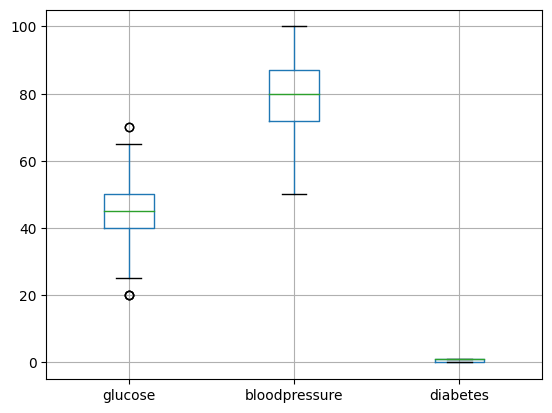

In [ ]:
df.boxplot()

In [ ]:
#calculating IQR
Q1 = np.percentile(df['glucose'], 25, method='midpoint')
Q3 = np.percentile(df['glucose'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

10.0


In [ ]:
# Above Upper bound
upper_limit=Q3+1.5*IQR
print("Upper Bound:",upper_limit)

#Below Lower bound
lower_limit=Q1-1.5*IQR
print("Lower Bound:",lower_limit)

Upper Bound: 65.0
Lower Bound: 25.0


In [ ]:
#Removing the outliers
z = np.where(df['glucose']>=upper_limit)[0]
w = np.where(df['glucose']<=lower_limit)[0]
df.drop(z, axis= 0, inplace=True)
df.drop(w, axis= 0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        972 non-null    int64
 1   bloodpressure  972 non-null    int64
 2   diabetes       972 non-null    bool 
dtypes: bool(1), int64(2)
memory usage: 23.7 KB


### Both "Glucose" and "Bloodpressure" are Quantitative while "Diabetes" is Categorical

In [ ]:
#split data vertically
X = df.drop(columns="diabetes")
y = df["diabetes"]

# Descriptive Statistics

In [ ]:
#calculating measures of central tendency
bldSTD = X["bloodpressure"].std()
bldMN = X["bloodpressure"].mean()
bldvar= np.var(X["bloodpressure"])
gluSTD = X["glucose"].std()
gluMN = X["glucose"].mean()
gluvar=np.var(X["glucose"])

print(f"bloodpressure\tmean: {bldMN} , \tstd: {bldSTD}  , \tdispersion: {bldvar}")
print(f"glucose\t\tmean: {gluMN} , \t\tstd: {gluSTD}  , \tdispersion: {gluvar} ")

bloodpressure	mean: 79.36934156378601 , 	std: 9.311322541690146  , 	dispersion: 86.61152919609138
glucose		mean: 44.35699588477366 , 		std: 5.958414281478385  , 	dispersion: 35.46617533743162 


# **Standard Data**

In [ ]:
#make the data standard by setting the mean to zero and the standard deviation to one
stand_bld=(X["bloodpressure"]-X["bloodpressure"].mean())/X["bloodpressure"].std()
stand_glu=( X["glucose"]-X["glucose"].mean())/X["glucose"].std()
stand_bldmn=np.mean(stand_bld)
stand_bldstd=np.std(stand_bld)

stand_glumn=np.mean(stand_glu)
stand_glustd=np.std(stand_glu)

print(f"bloodpressure\tmean:{round(stand_bldmn)}  \tstd: {ceil(stand_bldstd)}")
print(f"glucose\tmean:{round(stand_glumn)}  \tstd: {ceil(stand_glustd)}")

bloodpressure	mean:0  	std: 1
glucose	mean:0  	std: 1


#**Splitting Data**

In [ ]:
#split data horizontally (80% and 20%)
X_train_org,X_test_org,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print("Training size=",len(X_train_org), "\t,Test size=", len(X_test_org))

Training size= 777 	,Test size= 195


# **Splitting Data after standardisation**

In [ ]:
#split data horizontally (80% and 20%)
X_stand=pd.concat((stand_glu,stand_bld),axis=1)
X_train_stand, X_test_stand, y_train_stand, y_test_stand = train_test_split(X_stand, y, test_size=0.2, random_state=42)
print("Training size =",len(X_train_stand) , "\t,Test size =", len(X_test_stand))

Training size = 777 	,Test size = 195


# Histogram Plots

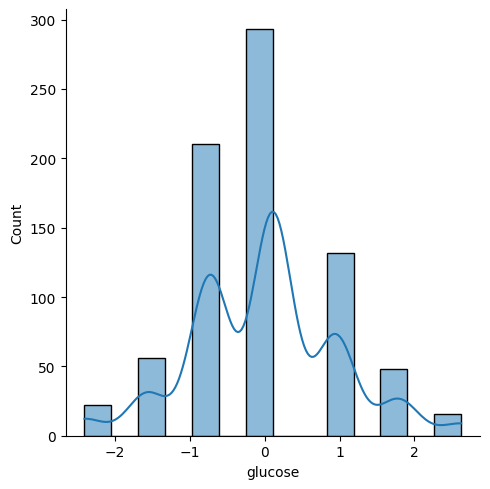

In [ ]:
#plot a histogram of "glucose"
sns.displot(X_train_stand["glucose"],kde=True,kind='hist')

### It's a multi-modal distribution

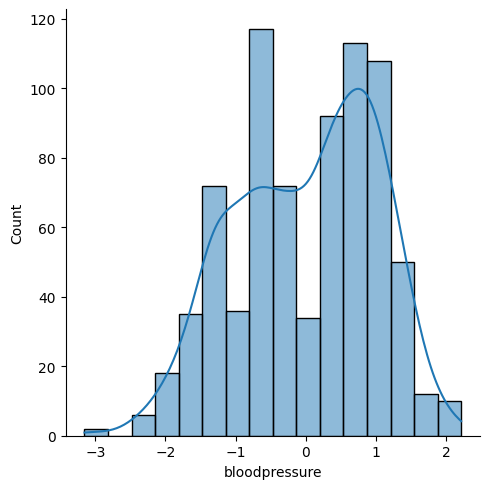

In [ ]:
#plot a histogram of "bloodpressure"
sns.displot(X_train_stand["bloodpressure"],kde=True,kind='hist')


### It's a bimodal distribution

# Testing Normality

In [ ]:
#for "Bloodpressure" column
#we use shapiro-wilk test
pvalue =shapiro(X_train_stand["bloodpressure"])
#here pvalue should be greater than 0.05 'significance level' to show that the X_train 'sample' drawn from a normally distributed population
print("pvalue:",pvalue)

pvalue: ShapiroResult(statistic=0.9726011753082275, pvalue=6.790084466912205e-11)


### Since the pvalue is less than 0.05 , we reject the null hypothesis and this means that the data is not a normal distribution

In [ ]:
#for "glucose" column
#we use shapiro-wilk test
pvalue=shapiro(X_train_stand["glucose"])
#here pvalue should be grater than 0.05'significance level' to show that the X_train 'sample' drawn from a normally distributed population
print("pvalue:",pvalue)

pvalue: ShapiroResult(statistic=0.9307020902633667, pvalue=1.7425194464549662e-18)


### Since pvalue is less than 0.05 , we reject the null hypothesis and this means that the data is not a normal distribution

In [ ]:
#splitting data according to classes
temp = pd.concat([X_train_stand, y_train_stand], axis =1)
trueClass = temp[temp["diabetes"] == True]
falseClass = temp[temp["diabetes"] == False]

## True Class

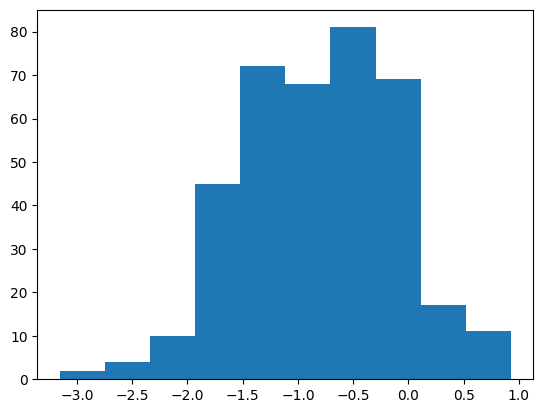

In [ ]:
#for "bloodpressure" column
plt.hist(trueClass["bloodpressure"]);

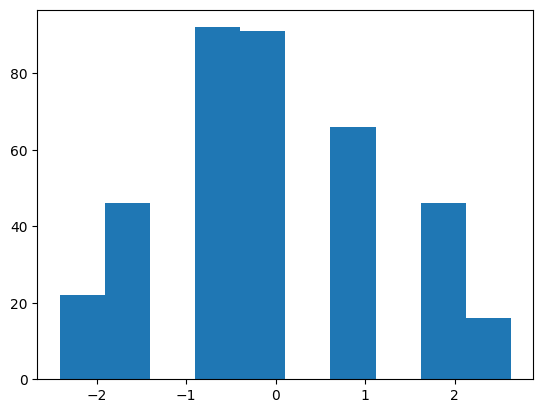

In [ ]:
#for "glucose" column
plt.hist(trueClass["glucose"]);

## False Class

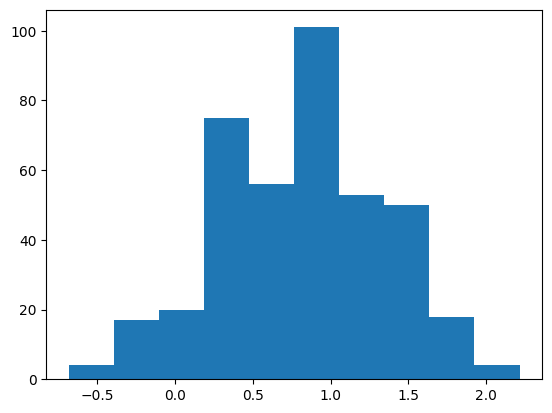

In [ ]:
#for "bloodpressure" column
plt.hist(falseClass["bloodpressure"]);

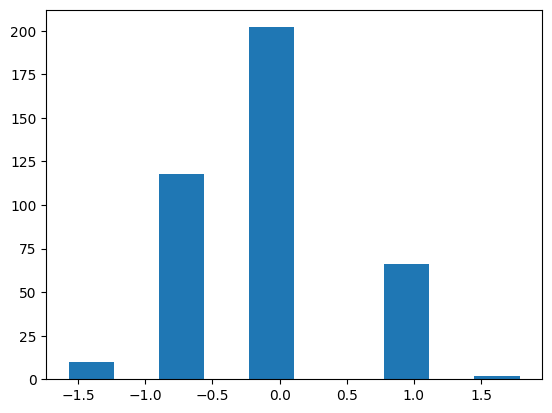

In [ ]:
#for "glucose" column
plt.hist(falseClass["glucose"]);

# **Creating the NB Model**

In [ ]:
#function to calculate the gaussian distribution
def getNormalDist(x, std, mean):
    power = -0.5 * ( (x - mean) / std)**2
    return (1 / std * np.sqrt(2*math.pi) ) * math.exp(power)

class NB:
    def __init__(self):
        #constuctor to set the initialize the variables
        self.pFalse = 0
        self.pTrue = 0

        self.falseBldMean = 0
        self.falseBldStd = 0
        self.falseGluMean = 0
        self.falseGluStd =0

        self.trueBldMean = 0
        self.trueBldStd = 0
        self.trueGluMean = 0
        self.trueGluStd =0



    def train(self, xNB, yNB):
        #to calculate the prior probabilities
        self.pFalse = yNB.value_counts()[0]/ len(yNB)
        self.pTrue = yNB.value_counts()[1]/ len(yNB)

        #getting records with ture "diabetes"
        tempDF = pd.concat([xNB, yNB], axis =1)
        trueDiabetes = tempDF[tempDF["diabetes"] == True]
        #getting parameters for normal distribution of records with true "diabetes"
        self.trueBldMean = trueDiabetes["bloodpressure"].mean()
        self.trueBldStd = trueDiabetes["bloodpressure"].std()
        self.trueGluMean = trueDiabetes["glucose"].mean()
        self.trueGluStd = trueDiabetes["glucose"].std()
        #getting records with false "diabetes"
        falseDiabetes = tempDF[tempDF["diabetes"] == False]

        #getting parameters for normal distribution of records with false "diabetes"
        self.falseBldMean = falseDiabetes["bloodpressure"].mean()
        self.falseBldStd = falseDiabetes["bloodpressure"].std()
        self.falseGluMean = falseDiabetes["glucose"].mean()
        self.falseGluStd = falseDiabetes["glucose"].std()



    def predict(self, inList):
        #empty list to hold prediction results
        pred = []

        for i in range(len(inList)):
            x = inList.iloc[i].values

            #calculate the probability of each category using Naive Bayes
            probFalse = self.pFalse * getNormalDist(x[0], self.falseGluStd, self.falseGluMean) * getNormalDist(x[1], self.falseBldStd, self.falseBldMean)
            probTrue = self.pTrue * getNormalDist(x[0], self.trueGluStd, self.trueGluMean) * getNormalDist(x[1], self.trueBldStd, self.trueBldMean)

            #add true or false to the predictions list depending on which probability is greater
            if probTrue >= probFalse:
                pred.append(True)
            else:
                pred.append(False)

        return pred

    def printAll(self):
        #print all variables to check
        print(self.pFalse)
        print(self.pTrue)

        print(self.falseBldMean)
        print(self.falseBldStd)
        print(self.falseGluMean)
        print(self.falseGluStd)

        print(self.trueBldMean)
        print(self.trueBldStd)
        print(self.trueGluMean)
        print(self.trueGluStd)



    def accuracy(self, inList, refList):
        #calculate the accuracy by adding 1 if the prediction is correct then divide by the length
        acc = 0
        for i in range(len(inList)):
            if(inList[i] == refList.iloc[i]):
                acc += 1

        return acc / len(inList) * 100

In [ ]:
#train the model
nb =NB()
nb.train(X_train_stand, y_train)

#predict the test set
pred = nb.predict(X_test_stand)
#print the first 5 predictions
print(pred[:5])
#calculate the accuracy
nb.accuracy(pred,y_test)

[True, True, False, True, True]


94.87179487179486

## Using Python Packages

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train_stand,y_train)
GNBpred = gnb.predict(X_test_stand)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,GNBpred)
print(accuracy*100)

match = 0
for i in range(len(pred)):
    if pred[i] == GNBpred[i]:
        match += 1

print(f"The two models have {match / len(pred)*100}% match")

94.87179487179486
The two models have 100.0% match
